In [1]:
# analiza wina

Wykonała Anna Sobczak 235148

Dane zostły pobrane z UC Irvine Machine Learning Repository!

Te dwa zestawy danych dotyczą czerwonych i białych odmian portugalskiego wina „Vinho Verde”. Ze względu na prywatność i kwestie logistyczne, tylko zmienne fizykochemiczne (dane wejściowe) i sensoryczne (wyjściowe)są dostępne (np. brak danych o rodzajach winogron, marce wina, cenie sprzedaży wina itp.).
Zestawy danych można postrzegać jako zadania klasyfikacji lub regresji. Klasy są uporządkowane i niezbilansowane.








Atrybuty <br>
Wejściowe: <br>
   1 - fixed acidity <br>
   2 - volatile acidity <br>
   3 - citric acid <br>
   4 - residual sugar <br>
   5 - chlorides <br>
   6 - free sulfur dioxide <br>
   7 - total sulfur dioxide <br>
   8 - density <br>
   9 - pH <br>
   10 - sulphates <br>
   11 - alcohol <br>
Wyjściowe:  <br>
   12 - quality (score between 0 and 10) <br>

In [2]:
# Import wymaganych bibliotek do obróbki danych

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [34]:
# Import danych
data_red = pd.read_csv('winequality-red.csv', delimiter=';')
data_white = pd.read_csv('winequality-white.csv', delimiter=';')

In [38]:
# Dodanie typu wina 0 - Czerwone 1 - Biale
data_red['type'] = 0 # Czerw0ne
data_white['type'] = 1 #B1ale

In [39]:
# Sprawdzenie pierwszych 5 rekordów
data_red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [40]:
# Sprawdzenie pierwszych 5 rekordów
data_white.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [47]:
data = pd.concat([data_white, data_red])

In [48]:
# Opis danych
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [49]:
# Informacje o danych
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [50]:
# Wykonanie profilu przy pomocy funkcji ProfiileReport z biblioteki pandas_profiling
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)


In [51]:
# Wyświetlenie wykonanego profilu
# profile.to_notebook_iframe()


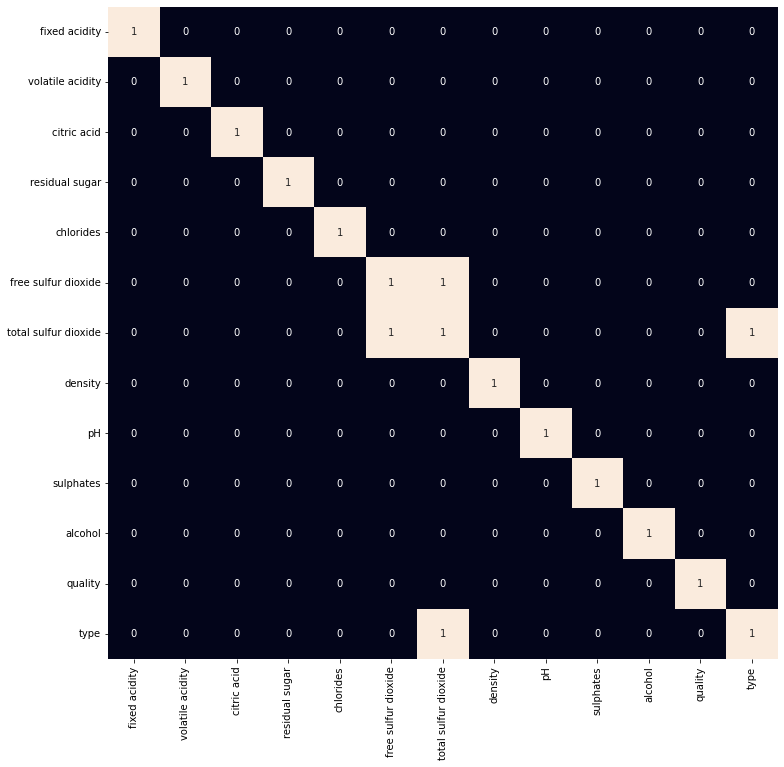

In [96]:
# Biblioteka seaborn oparta jest na bibliotece matplotlib i służy do wizualizacji danych
import seaborn as sb 
plt.figure(figsize=(12, 12))
# Szukanie korelacji większej niż 0.7 pomiędzy atrybutami
sb.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

<b>Wybór cech</b>

quality - cecha podlegająca predykcji <br>

Cechy użyte do utworzenia klasyfikatora: <br>
fixed acidity <br>
volatile acidity <br>
citric acid <br>
residual sugar <br>
chlorides <br>
free sulfur dioxide <br>
density <br>
pH <br>
sulphates <br>
alcohol <br>

Z cech została usunięta kolumna 'total sulfur dioxide' w powodu korelacji z cechą 'total sulfur dioxide' i 'type'

<b>Cel i metody:</b><br>
Moim celem jest stworzenie klasyfikatora, który za pomocą podanych warrtości będzie mógł sklasyfikować jakość wina z podziałem na wina lepszej i gorzej jakości. 
Użyję do tego metody kNN (metoda najbliższych sąsiadów).

In [97]:
# Przygotowywanie danych do klasyfikacji
# Podział danych został wykonany przy pomocy biblioteki sklearn.
# Dane zostały podzielone podzielone w nastepujących proporcjach: 30% dane testowe, 70% dane treningowe.
# Dane treningowe posłużą do stworzenia modelu, natomiast dane testowe do sprawdzenia jego dokładności. 


from sklearn.model_selection import train_test_split 

# Usunięcie z puli cech kolumn quality oraz total sulfur dioxide
features = data.drop(['quality'], axis=1) 
features = data.drop(['total sulfur dioxide'], axis=1) 

# Wyodrębnienie kolumny quality
# Podmiana wartości w kolumnie quality
# Wszystkim winom o jakości < 5 została przypisana wartość 0
# Wszystkim winom o jakości > 6 została przypisana wartość 1
target = data['quality'].apply(lambda y: 1 if y>6 else 0)


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=69)


In [132]:
# biblioteka jest odpowiedzialna za metodę k-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier 

# Stworzenie klasyfikatora KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Trenowanie modelu
train = knn.fit(x_train, y_train)

# Przewidywanie wyniku dla zestawu testującego
y_prediction = knn.predict(x_test)

# Porównanie wyników dla pierwszych 5 rekordów
print("Prawdziwe wyniki:\n", y_test[0:5].tolist())
print("Wyniki przewidywań:\n", knn.predict(X_test[0:5]))


Prawdziwe wyniki:
 [1, 0, 0, 1, 0]
Wyniki przewidywań:
 [0 0 0 1 0]


In [133]:
# Średnia poprawność modelu dla zestawu testowego i treningowego 
print('Poprawność metody kNN dla zestawu testowego: %f' % train.score(x_test, y_test))
print('Poprawność metody kNN  dla zestawu trenigowego: %f' % train.score(x_train, y_train))

Poprawność metody kNN dla zestawu testowego: 0.952821
Poprawność metody kNN  dla zestawu trenigowego: 1.000000


1


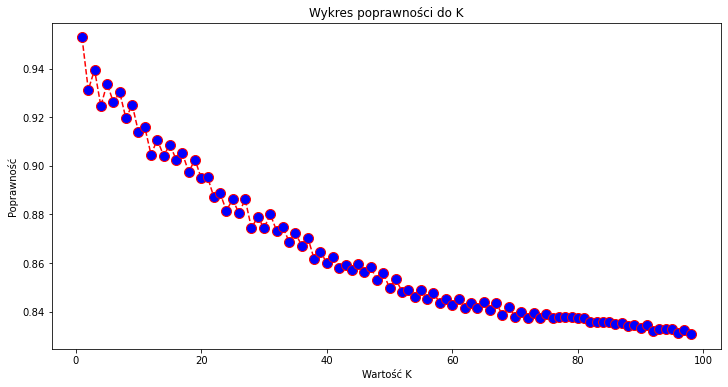

In [138]:
# Szukanie optymalnego K 
from sklearn.metrics import accuracy_score
ac = []
for i in range(1, 99):
    knn = KNeighborsClassifier(n_neighbors=i)
    train = knn.fit(x_train, y_train)
    y_pred_i = knn.predict(x_test)
    ac.append(accuracy_score(y_test, y_pred_i))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 99), ac, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Wykres poprawności do K')
plt.xlabel('Wartość K')
plt.ylabel('Poprawność')

print("Optymalne K", np.argmax(ac) + 1)

In [135]:
from sklearn import metrics 

# Ocena poprawności klasyfkiacji przy pomocy biblioteki sklearn
print("Poprawność przewidywań: ", round(metrics.accuracy_score(y_test, y_prediction), 5))


Poprawność przewidywań:  0.95282


In [101]:
# Raport klasyfikacji
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1567
           1       0.88      0.88      0.88       383

    accuracy                           0.95      1950
   macro avg       0.92      0.93      0.93      1950
weighted avg       0.95      0.95      0.95      1950



In [136]:

# f1-score 0.92, im bliżej 1 tym model jest lepszy 


In [137]:
# Tablicy pomyłek
confusion = metrics.confusion_matrix(y_test, y_prediction)
print(confusion)

# (True Positive)TP - poprawnie przewidziany wino dobrej jakości
# (True Negarive)TN - poprawnie przewidziane wino gorszej jakości
# (False Positive)FP - niepoprawnie przewidaine wino dobrej jakości
# (False Negative)FN - niepoprawnie przewidane wino gorszej jakości 

# Przypisanie wartośći do odpowiednich części tablicy
TP = confusion[1, 1] # 338
TN = confusion[0, 0] # 1520
FP = confusion[0, 1] # 47
FN = confusion[1, 0] # 45



[[1520   47]
 [  45  338]]


In [105]:
# Obliczanie poprawność klasyfikacji oznaczającą jak często klasyfikator jest poprawny
# Obliczenie popranowsci oraz błędu klasyfikacji,obrazujących jak czesto 
# klasyfikator pokazuje poprawny wynik oraz jak czesto się myli
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Poprawność', round(classification_accuracy, 5))
print('Błąd', round(classification_error, 5))

Poprawność 0.95282
Błąd 0.04718


1